# Proyek Analisis Data: Brazilian E-Commerce Public Dataset by Olist
- Nama: Muh. Fathur Rahman Awaluddin
- Email: felixanderkai@gmail.com
- ID Dicoding: farhan23

## Menentukan Pertanyaan Bisnis
- Bagaimana aktivitas serta nilai transaksi dari pengguna dari e-commerce pada dua tahun terakhir?
- Kategori produk manakah yang memiliki jumlah penjualan tertinggi dan terendah?
- Bagaimana tingkat kepuasan pengguna melakukan pembelian berdasarkan jumlah rating?
- Pelanggan manakah yang melakukan transaksi terbaru?
- Seberapa sering seorang pengguna melakukan pembelian dalam beberapa bulan terakhir?
- Berapa banyak uang yang dihabiskan pengguna dalam beberapa bulan terakhir?

## Menyiapkan semua library yang dibutuhkan

In [1]:
# Import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import uuid

## Data Wrangling

### Gathering Data

In [2]:
# Import csv dataset sebagai dataframe
customers_df = pd.read_csv('./data/customers_dataset.csv')
products_df = pd.read_csv('./data/products_dataset.csv')
category_translation_df = pd.read_csv('./data/product_category_name_translation.csv')
orders_df = pd.read_csv('./data/orders_dataset.csv')
items_df = pd.read_csv('./data/order_items_dataset.csv')
reviews_df = pd.read_csv('./data/order_reviews_dataset.csv')
payments_df = pd.read_csv('./data/order_payments_dataset.csv')

### Assessing Data

In [3]:
# Melihat data descriptive statistics untuk dataframe customers
customers_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [4]:
# Melihat kondisi dataframe orders
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [5]:
# Mengecek jumlah baris dataframe customers yang terduplikasi
customers_df.duplicated().sum()

0

In [6]:
# Mengecek 5 baris pertama dataframe customers
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


Pada kolom "customer_unique_id" pengguna diberikan index dengan format yang cukup rumit, hal ini akan diselesaikan pada tahap data cleaning

In [7]:
# Melihat data descriptive statistics untuk dataframe products
products_df.describe(include="all")

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951,32341,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
unique,32951,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,NaN,NaN,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000


In [8]:
# Melihat kondisi dataframe products
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [9]:
# Mengecek jumlah data kosong dari setiap kolom pada dataframe products
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

Terdapat 4 kolom yang sama-sama memiliki 610 jumlah data yang hilang termasuk product_category_name, hal ini akan diselesaikan pada tahap data cleaning

In [10]:
# Mengecek jumlah baris dataframe products yang terduplikasi
products_df.duplicated().sum()

0

In [11]:
# Melihat data descriptive statistics untuk dataframe category_translations
category_translation_df.describe(include="all")

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


In [12]:
# Melihat kondisi dataframe category_translations
category_translation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [13]:
# Mengecek jumlah baris dataframe category_translations yang terduplikasi
category_translation_df.duplicated().sum()

0

Dataframe category_translations tidak terdapat keanehan, akan tetapi memiliki jumlah kolom product_category_name_english sebanyak 71, sementara kolom product_category_name pada dataframe products memiliki 73 nilai unik, hal ini akan diselesaikan ketika penggabungan kedua dataframe

In [14]:
# Melihat data descriptive statistics untuk dataframe orders
orders_df.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


Beberapa kolom yang menampilkan tanggal termasuk kolom order_approved_at memiliki tipe data objek dan akan dibuah menjadi datetime, hal ini akan diselesaikan pada tahap data cleaning

In [15]:
# Melihat kondisi dataframe orders
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [16]:
# Mengecek jumlah data kosong dari setiap kolom pada dataframe orders
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [17]:
# Mengecek jumlah baris dataframe orders yang terduplikasi
orders_df.duplicated().sum()

0

In [18]:
# Melihat data descriptive statistics untuk dataframe reviews
reviews_df.describe(include="all")

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,99224,99224,99224.000000,11568,40977,99224,99224
unique,98410,98673,NaN,4527,36159,636,98248
top,7b606b0d57b078384f0b58eac1d41d78,c88b1d1b157a9999ce368f218a407141,NaN,Recomendo,Muito bom,2017-12-19 00:00:00,2017-06-15 23:21:05
freq,3,3,NaN,423,230,463,4
mean,NaN,NaN,4.086421,NaN,NaN,NaN,NaN
std,NaN,NaN,1.347579,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN


In [19]:
# Melihat kondisi dataframe reviews
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [20]:
# Mengecek jumlah data kosong dari setiap kolom pada dataframe reviews
reviews_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

Dataframe reviews tidak terdapat keanehan, kecuali pada kolom review_comment_title dan review_comment_message, diwajarkan karena reviews tidak mengharuskan pengguna melengkapi data tersebut

In [21]:
# Mengecek jumlah baris dataframe reviews yang terduplikasi
reviews_df.duplicated().sum()

0

In [22]:
# Melihat data descriptive statistics untuk dataframe payments
payments_df.describe(include="all")

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


In [23]:
# Melihat kondisi dataframe payments
payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [24]:
# Mengecek jumlah data kosong dari setiap kolom pada dataframe payments
payments_df.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [25]:
# Mengecek jumlah baris dataframe payments yang terduplikasi
payments_df.duplicated().sum()

0

In [26]:
# Melihat data descriptive statistics untuk dataframe items
items_df.describe(include="all")

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,93318,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN
freq,21,NaN,527,2033,21,NaN,NaN
mean,NaN,1.197834,NaN,NaN,NaN,120.653739,19.990320
std,NaN,0.705124,NaN,NaN,NaN,183.633928,15.806405
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,NaN,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,NaN,134.900000,21.150000


In [27]:
# Melihat kondisi dataframe items
items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [28]:
# Mengecek jumlah data kosong dari setiap kolom pada dataframe items
items_df.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [29]:
# Mengecek jumlah baris dataframe items yang terduplikasi
items_df.duplicated().sum()

0

Dataframe items tidak terdapat keanehan.

### Cleaning Data

In [30]:
# Merapikan format index pengguna, dengan cara penambahan CUST- diikuti angka acak dengan digit yang sama dengan jumlah digit total customer_unique_id
num_digits = len(str(customers_df['customer_unique_id'].iloc[0]))
customers_df['customer_unique_id'] = customers_df.groupby('customer_unique_id').ngroup().add(1).apply(lambda x: f"CUST-{x:{num_digits}}")
customers_df['customer_unique_id'] = customers_df['customer_unique_id'].str.strip()
customers_df['customer_unique_id'] = customers_df['customer_unique_id'].str.replace(' ', '')

In [31]:
# Menghapus data dengan kolom product_category_name yang hilang
products_df.dropna(subset=['product_category_name'], inplace=True)

In [32]:
# Mengganti tipe data tanggal pada kolom product_category_name dari object menjadi datetime
orders_df["order_approved_at"] = pd.to_datetime(orders_df["order_approved_at"])

## Exploratory Data Analysis (EDA)

### Explore products_df

In [33]:
# Memberikan nama translasi kepada produk, lalu melihat kategori produk dengan jumlah penjualan tertinggi
merged_df = products_df.merge(category_translation_df, on="product_category_name", how="left")
merged_df["product_category_name_english"].fillna(merged_df["product_category_name"], inplace=True)
products_df["product_category_name"] = merged_df["product_category_name_english"]
products_df.groupby(by="product_category_name").product_id.nunique().sort_values(ascending=False)

product_category_name
bed_bath_table               2971
sports_leisure               2794
furniture_decor              2601
health_beauty                2410
housewares                   2284
                             ... 
fashion_childrens_clothes       5
home_comfort_2                  4
pc_gamer                        3
security_and_services           2
cds_dvds_musicals               1
Name: product_id, Length: 73, dtype: int64

### Explore reviews_df

In [34]:
# Melihat jumlah dari setiap rating yang diberikan pengguna
reviews_df.groupby(by="review_score").order_id.nunique().sort_values(ascending=False)

review_score
5    57076
4    19098
1    11393
3     8160
2     3148
Name: order_id, dtype: int64

### Explore order_df

In [35]:
# Melihat jumlah payment value untuk setiap order
order_items_df = pd.merge(
    left=orders_df,
    right=items_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
order_value_df = pd.merge(
    left=order_items_df,
    right=payments_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
order_value_df.groupby("order_id")["payment_value"].sum().reset_index(name="total_payment_value").sort_values(by="total_payment_value", ascending=False)

,order_id,total_payment_value
1471,03caa2c082116e1d31e67e9ae3700499,109312.64
66248,ab14fdcfbe524636d65ee38360e22ce8,45256.00
10541,1b15974a0141d54e36626dca3fdc731a,44048.00
17255,2cc9089445046817a7539d90805e6e5a,36489.24
90542,e8fa22c3673b1dd17ea315021b1f0f61,30186.00
...,...,...
93950,f1d5c2e6867fa93ceee9ef9b34a53cbf,9.59
78008,c8c528189310eaa44a745b8d9d26908b,0.00
74448,bfbd0f9bdef84302105ad712db648a6c,0.00
27282,4637ca194b6387e2d538dc89b124b0ee,0.00


### Explore category_df

In [36]:
# Melihat jumlah payment value untuk setiap kategori
category_value_df = pd.merge(
    left=order_value_df,
    right=products_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)
category_value_df.groupby("product_category_name")["payment_value"].sum().reset_index(name="total_payment_value").sort_values(by="total_payment_value", ascending=False)

,product_category_name,total_payment_value
7,bed_bath_table,1964943.61
67,sports_leisure,1724162.79
39,furniture_decor,1636869.91
43,health_beauty,1498051.23
49,housewares,1412820.89
...,...,...
29,fashion_childrens_clothes,2073.07
59,pc_gamer,1087.51
11,cds_dvds_musicals,949.19
63,security_and_services,685.66


### Explore customers & payment_df

In [37]:
# Melihat jumlah payment value untuk setiap customer
customer_order_value_df = pd.merge(
    left=category_value_df,
    right=customers_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
customer_order_value_df.groupby("customer_unique_id")["payment_value"].sum().reset_index(name="total_payment_value").sort_values(by="total_payment_value", ascending=False)

,customer_unique_id,total_payment_value
31412,CUST-3827,109312.64
33025,CUST-39721,45256.00
70740,CUST-73665,44048.00
15694,CUST-24122,36489.24
88893,CUST-90001,30186.00
...,...,...
67839,CUST-71053,10.07
9606,CUST-18644,9.59
22198,CUST-29978,0.00
51691,CUST-56520,0.00


### Explore all_df

In [38]:
# Melakukan penggabungan seluruh dataframe, lalu melakukan pemerikasaan kondisi
all_df = pd.merge(
    left=customer_order_value_df,
    right=reviews_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119143 entries, 0 to 119142
Data columns (total 36 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       119143 non-null  object        
 1   customer_id                    119143 non-null  object        
 2   order_status                   119143 non-null  object        
 3   order_purchase_timestamp       119143 non-null  object        
 4   order_approved_at              118966 non-null  datetime64[ns]
 5   order_delivered_carrier_date   117057 non-null  object        
 6   order_delivered_customer_date  115722 non-null  object        
 7   order_estimated_delivery_date  119143 non-null  object        
 8   order_item_id                  118310 non-null  float64       
 9   product_id                     118310 non-null  object        
 10  seller_id                      118310 non-null  object        
 11  

Dapat dilihat bahwa jumlah data dari berbagai kolom pada dataframe all berbeda-beda, karena analisis membutuhkan data berdasarkan order yang telah disahkan maka akan dilakukan filtrasi data kembali

In [39]:
# Menghapus setiap baris yang memiliki kekosongan pada kolom order_approved_at
all_df.dropna(subset=['order_approved_at'],inplace=True)
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118966 entries, 0 to 119142
Data columns (total 36 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       118966 non-null  object        
 1   customer_id                    118966 non-null  object        
 2   order_status                   118966 non-null  object        
 3   order_purchase_timestamp       118966 non-null  object        
 4   order_approved_at              118966 non-null  datetime64[ns]
 5   order_delivered_carrier_date   117042 non-null  object        
 6   order_delivered_customer_date  115707 non-null  object        
 7   order_estimated_delivery_date  118966 non-null  object        
 8   order_item_id                  118295 non-null  float64       
 9   product_id                     118295 non-null  object        
 10  seller_id                      118295 non-null  object        
 11  shipp

In [40]:
# Melihat jumlah payment value untuk setiap order
all_df.groupby(by=["order_id"]).agg({
    "product_id": "nunique",
    "payment_value": "sum"
})

,product_id,payment_value
order_id,,
00010242fe8c5a6d1ba2dd792cb16214,1,72.19
00018f77f2f0320c557190d7a144bdd3,1,259.83
000229ec398224ef6ca0657da4fc703e,1,216.87
00024acbcdf0a6daa1e931b038114c75,1,25.78
00042b26cf59d7ce69dfabb4e55b4fd9,1,218.04
...,...,...
fffc94f6ce00a00581880bf54a75a037,1,343.40
fffcd46ef2263f404302a634eb57f7eb,1,386.53
fffce4705a9662cd70adb13d4a31832d,1,116.85


In [41]:
# Melihat penjualan untuk setiap kategori
all_df.groupby(by=["product_category_name"]).agg({
    "order_id": "nunique",
})

,order_id
product_category_name,
agro_industry_and_commerce,211
air_conditioning,366
art,132
arts_and_craftmanship,43
audio,102
...,...
stationery,2717
tablets_printing_image,13
telephony,3714


In [42]:
all_df.to_csv("./data/all_data.csv", index=False)

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana aktivitas serta nilai transaksi dari pengguna dari e-commerce pada dua tahun terakhir?

In [43]:
# Menyusun monthly_orders_df berdasarkan bulan dari kolom order_approved_at. Dengan agregasi order_id yang unik serta jumlah payment_value
monthly_orders_df = all_df.resample(rule='M', on='order_approved_at').agg({
    "order_id": "nunique",
    "payment_value": "sum",
})

# Memberikan nama baru untuk setiap kolom. order_approved_at menjadi order_month, order_id menjadi order_count, dan payment_value menjadi payment.
monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.rename(columns={
    "order_approved_at": "order_month",
    "order_id": "order_count",
    "payment_value": "payment"
}, inplace=True)

# Membuat kolom order_month menjadi tipe data datetime dengan format %b-%Y
monthly_orders_df['order_month'] = pd.to_datetime(monthly_orders_df['order_month'], format='%b-%Y')

# Mengurangi bulan terkahir data diambil
recent_month = monthly_orders_df['order_month'].max().replace(day=1)
monthly_orders_df = monthly_orders_df[monthly_orders_df['order_month'] < recent_month]

# Menyusun monthly_orders_df berdasarkan order_month
monthly_orders_df = monthly_orders_df.sort_values('order_month')
monthly_orders_df

,order_month,order_count,payment
0,2016-09-30,1,0.00
1,2016-10-31,320,75985.54
2,2016-11-30,0,0.00
3,2016-12-31,1,19.62
4,2017-01-31,760,182178.36
5,2017-02-28,1765,350023.57
6,2017-03-31,2689,547228.40
7,2017-04-30,2374,506593.88
8,2017-05-31,3693,736346.88
9,2017-06-30,3252,620191.15


Karena grafik ini berfungsi untuk melihat perkembangan e-commerce dari setiap bulan, maka untuk menjawab ini kita perlu menghilangkan data dari bulan yang belum selesai. Oleh karena itu, data dari bulan September 2018 dimasukkan dalam perhitungan agar menghindari adanya misleading

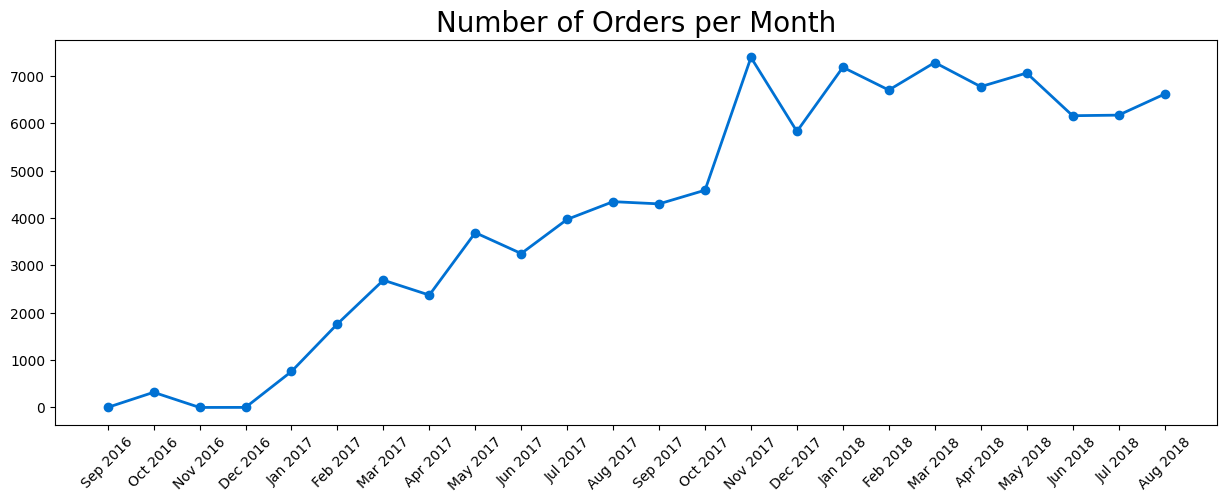

In [44]:
# Membuat visualisasi data penjualan berdasarkan bulan dengan perbandingan jumlah order
plt.figure(figsize=(15, 5)) 
plt.plot(monthly_orders_df["order_month"].dt.strftime('%b %Y'), monthly_orders_df["order_count"], marker='o', linewidth=2, color="#0071D3")
plt.title("Number of Orders per Month", loc="center", fontsize=20) 
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10) 
plt.show()

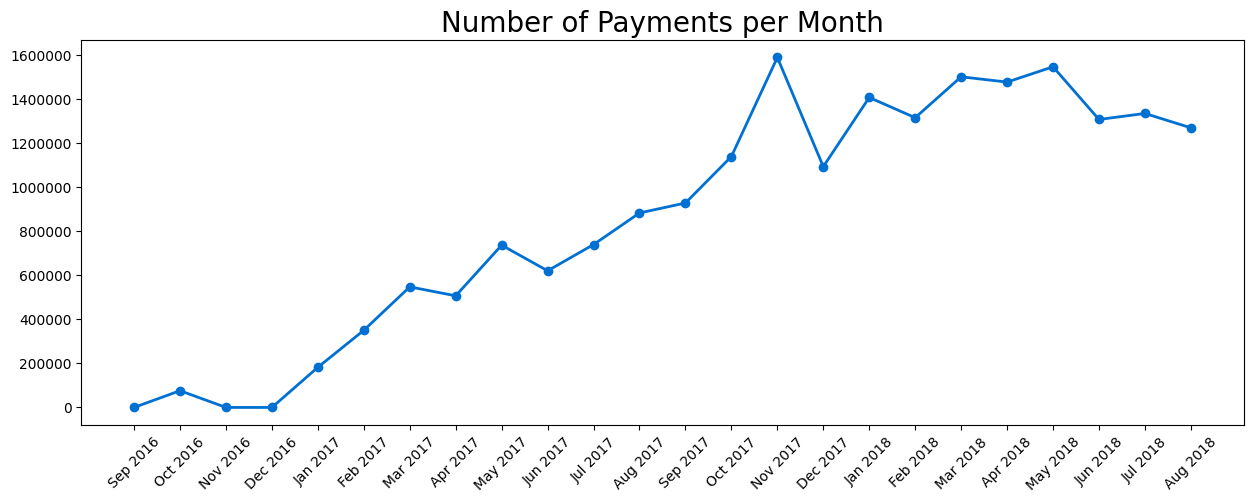

In [45]:
# Membuat visualisasi data penjualan berdasarkan bulan dengan perbandingan jumlah payment value
plt.figure(figsize=(15, 5)) 
plt.plot(monthly_orders_df["order_month"].dt.strftime('%b %Y'), monthly_orders_df["payment"], marker='o', linewidth=2, color="#0071D3")
plt.title("Number of Payments per Month", loc="center", fontsize=20) 
plt.xticks(fontsize=10, rotation=45) 
plt.yticks(fontsize=10)
plt.ticklabel_format(axis='y', style='plain')
plt.show()

### Pertanyaan 2: Kategori produk manakah yang memiliki jumlah penjualan tertinggi dan terendah?

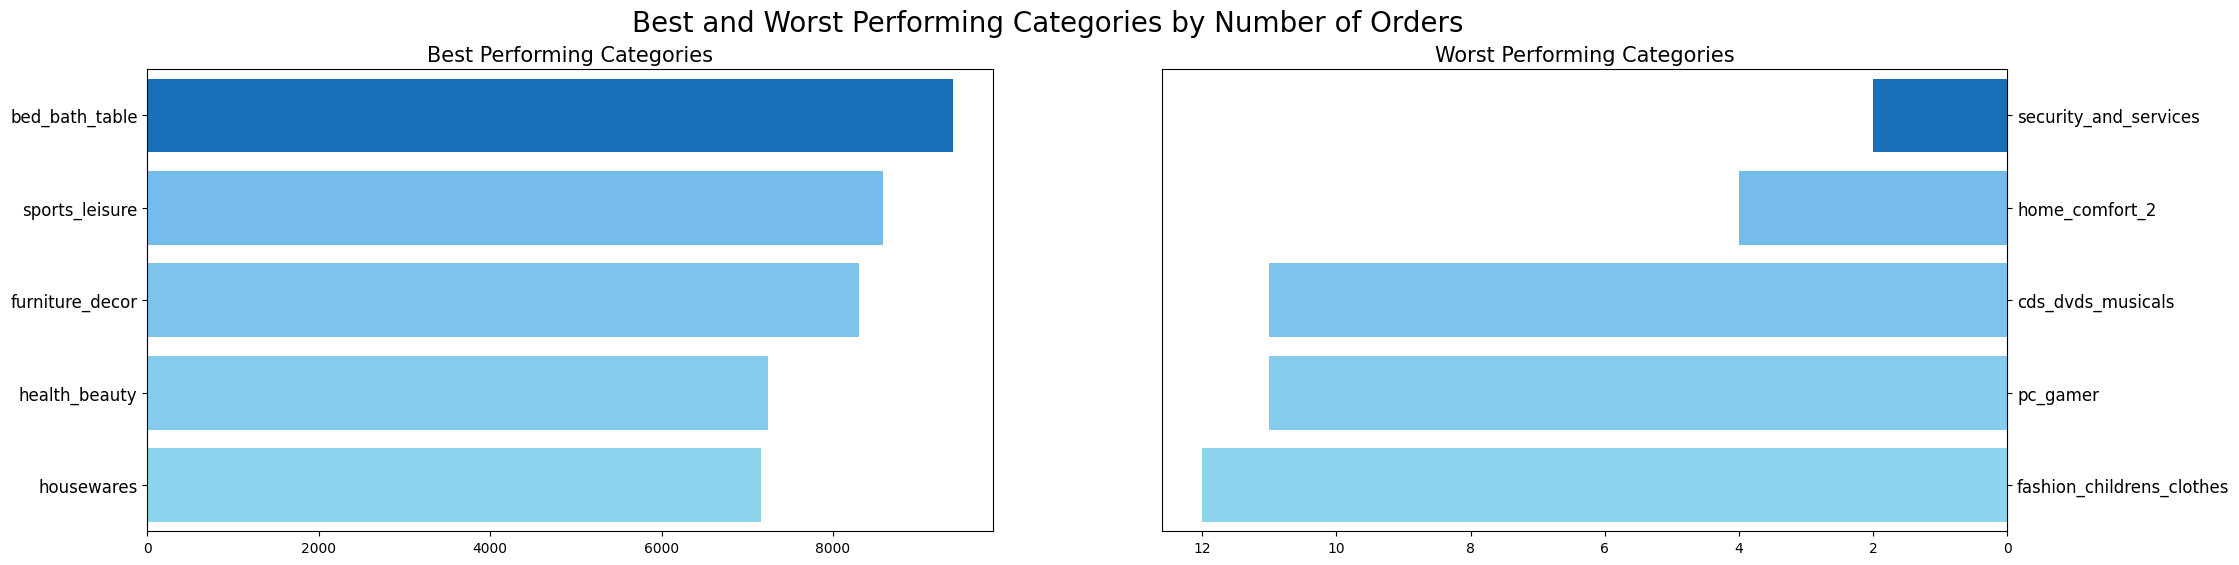

In [46]:
# Menyusun sum_order_items_df berdasarkan product_category_name dengan jumlah order_id dari nilai tertinggi
sum_order_items_df = all_df.groupby("product_category_name").order_id.nunique().sort_values(ascending=False).reset_index()

# Pembuatan dua grafik
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))
 
colors = ["#0071D3", "#61BEFF", "#6AC8FF", "#74D1FF", "#7EDBFF"]

# Pembuatan grafik bar yang menunjukkan 5 kategori produk dengan penjualan tertinggi
sns.barplot(x="order_id", y="product_category_name", data=sum_order_items_df.head(5), palette=colors, hue="product_category_name", ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best Performing Categories", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)
 
# Pembuatan grafik bar yang menunjukkan 5 kategori produk dengan penjualan terendah
sns.barplot(x="order_id", y="product_category_name", data=sum_order_items_df.sort_values(by="order_id", ascending=True).head(5), palette=colors, hue="product_category_name", ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst Performing Categories", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

# Menambahkan title 
plt.suptitle("Best and Worst Performing Categories by Number of Orders", fontsize=20)
plt.show()

### Pertanyaan 3: Bagaimana tingkat kepuasan pengguna melakukan pembelian berdasarkan jumlah rating?

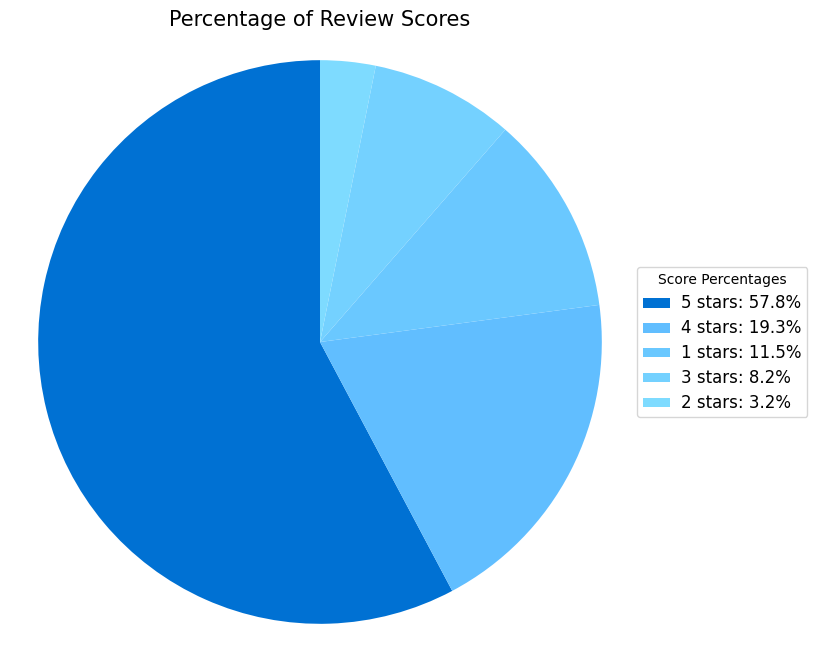

In [47]:
# Menyusun byscore_df berdasarkan review_score dengan jumlah order_id
byscore_df = all_df.groupby(by="review_score").order_id.nunique().reset_index()
byscore_df.rename(columns={
    "order_id": "order_count"
}, inplace=True)

# Menetapkan persentase setiap skor dan menyusun dari yang tertinggi
total_orders = byscore_df['order_count'].sum()
byscore_df['percentage'] = (byscore_df['order_count'] / total_orders) * 100
byscore_df = byscore_df.sort_values(by='percentage', ascending=False)

# Membentuk grafik
labels = byscore_df['review_score']
sizes = byscore_df['percentage']
colors = ["#0071D3", "#61BEFF", "#6AC8FF", "#74D1FF", "#7EDBFF"]

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=None, colors=colors, autopct='', startangle=90, wedgeprops={'linewidth': 0})

# Membentuk legenda
legend=plt.legend([f"{label:.0f} stars: {size:.1f}%" for label, size in zip(labels, sizes)], loc="center left", bbox_to_anchor=(1, 0, 0.5, 1), title="Score Percentages")
for text in legend.get_texts():
    text.set_fontsize(12)

plt.axis('equal')

# Menambahkan title 
plt.title("Percentage of Review Scores", fontsize=15)
plt.show()

### RFM Analysis

In [48]:
# Menyusun rfm_df berdasarkan customer_unique_id. Dengan agregasi nilai tertinggi order_approved_at, jumlah order_id, serta jumlah payment_value
rfm_df = all_df.groupby(by="customer_unique_id", as_index=False).agg({
    "order_approved_at": "max",
    "order_id": "nunique",
    "payment_value": "sum"
})
# Memberikan nama masing-masing kolom
rfm_df.columns = ["customer_unique_id", "max_order_timestamp", "frequency", "monetary"]

# Mencari nilai transaksi terbaru pada kolom recency yang menggantikan kolom max_order_timestamp
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = all_df["order_approved_at"].dt.date.max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)
rfm_df.drop("max_order_timestamp", axis=1, inplace=True)

rfm_df.head()

,customer_unique_id,frequency,monetary,recency
0,CUST-1,1,141.90,116
1,CUST-10,1,129.76,175
2,CUST-100,1,137.26,539
3,CUST-1000,1,2024.31,152
4,CUST-10000,1,221.67,372


### Pertanyaan 4: Pelanggan manakah yang melakukan transaksi terbaru?

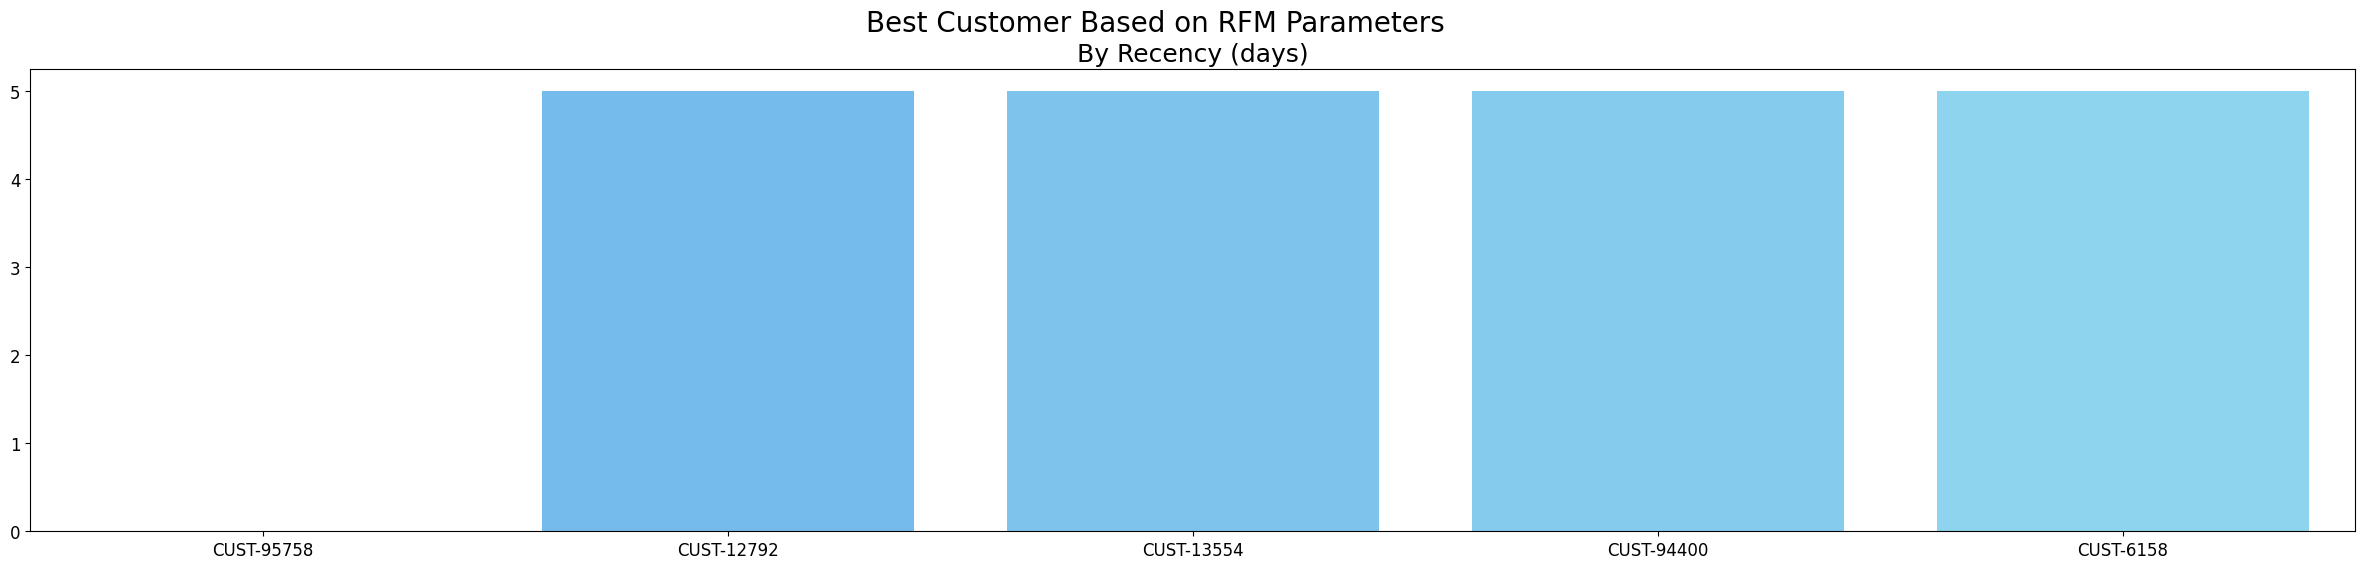

In [49]:
# Membentuk grafik rfm para pengguna berdasarkan recency
fig, ax = plt.subplots(figsize=(30, 6))
 
colors = ["#0071D3", "#61BEFF", "#6AC8FF", "#74D1FF", "#7EDBFF"]
 
sns.barplot(y="recency", x="customer_unique_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, hue="customer_unique_id")
ax.set_ylabel(None)
ax.set_xlabel(None)
ax.set_title("By Recency (days)", loc="center", fontsize=18)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

plt.suptitle("Best Customer Based on RFM Parameters", fontsize=20)
plt.show()

### Pertanyaan 5: Seberapa sering seorang pengguna melakukan pembelian dalam beberapa bulan terakhir?

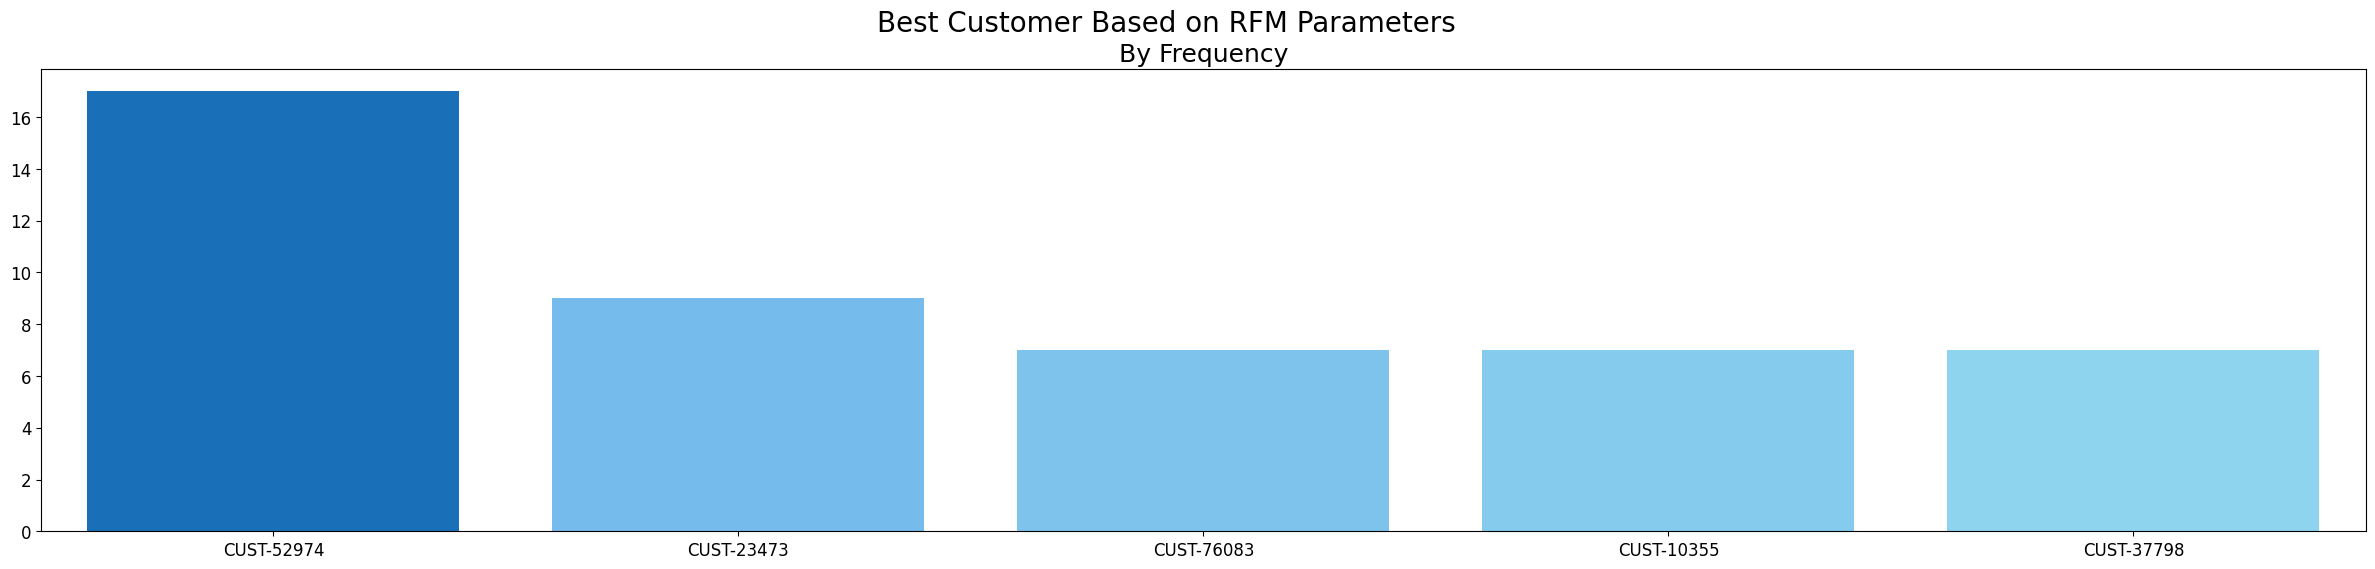

In [50]:
# Membentuk grafik rfm para pengguna berdasarkan frequency
fig, ax = plt.subplots(figsize=(30, 6))
 
colors = ["#0071D3", "#61BEFF", "#6AC8FF", "#74D1FF", "#7EDBFF"]
 
sns.barplot(y="frequency", x="customer_unique_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, hue="customer_unique_id")
ax.set_ylabel(None)
ax.set_xlabel(None)
ax.set_title("By Frequency", loc="center", fontsize=18)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

plt.suptitle("Best Customer Based on RFM Parameters", fontsize=20)
plt.show()

### Pertanyaan 6: Berapa banyak uang yang dihabiskan pengguna dalam beberapa bulan terakhir?

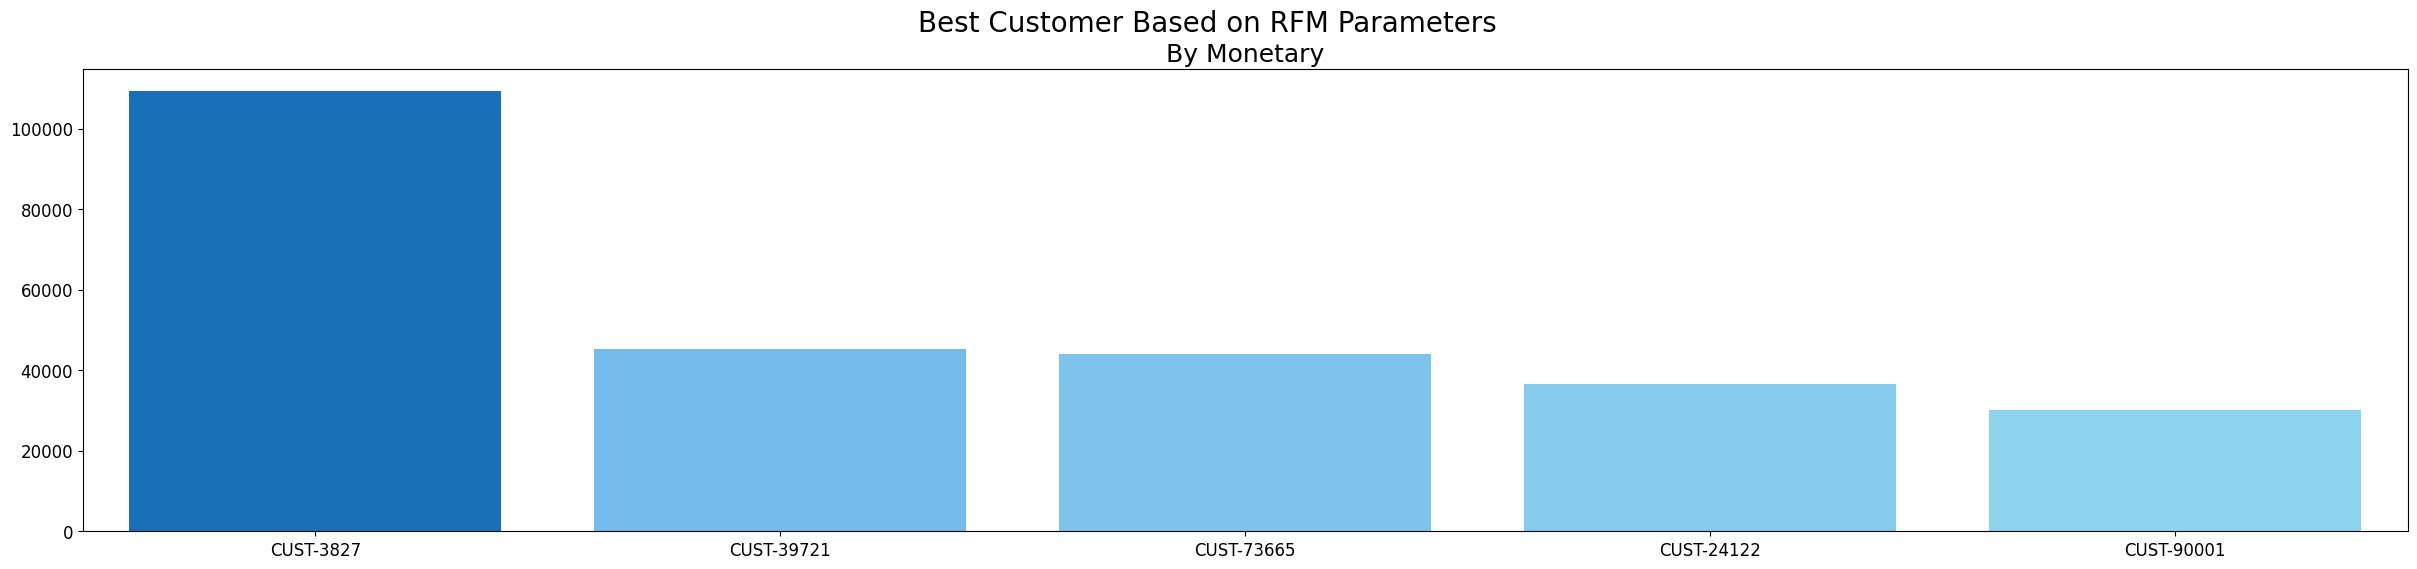

In [51]:
# Membentuk grafik rfm para pengguna berdasarkan monetary
fig, ax = plt.subplots(figsize=(30, 6))
 
colors = ["#0071D3", "#61BEFF", "#6AC8FF", "#74D1FF", "#7EDBFF"]
 
sns.barplot(y="monetary", x="customer_unique_id", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, hue="customer_unique_id")
ax.set_ylabel(None)
ax.set_xlabel(None)
ax.set_title("By Monetary", loc="center", fontsize=18)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

plt.suptitle("Best Customer Based on RFM Parameters", fontsize=20)
plt.show()

## Conclusion

- Conclusion pertanyaan 1:
  Pada grafik pertama, dapat diambil kesimpulan bahwa jumlah penjualan serta payment pada dua tahun terakhir mengalami kenaikan drastis dari bulan Oktober ke November 2017 yang diikuti penurunan tertinggi dari bulan November ke Desember 2017. Hal ini, membuat November 2017 menjadi bulan dengan jumlah penjualan tertinggi.
  
- Conclusion pertanyaan 2:
  Grafik kedua menunjukkan bahwa kategori produk dengan jumlah penjualan tertinggi diduduki oleh bed_bath_table dengan jumlah lebih dari 8000 order, diikuti sports_leisure dengan jumlah order yang sedikit lebih dari 8000, lalu ada kategori health_beauty dan houseware yang berada di atara 6000 order dan 8000 order. Sementara itu, penjualan terendah diduduki oleh security_and_services dengan 2 orderan, selain itu kategori home_comfort_2 dengan dengan jumlah order 4. Kemudian terdapat kategori cds_dvds_musicals, dengan 11 orderan. Terakhir, fashion_childrens_clothes yang memiliki jumlah order 12

- Conclusion pertanyaan 3:
  Berdasarkan grafik ketiga, sebanyak 57,8% pengalaman menggunakan Happy Mart dinilai sempurna oleh para pengguna, yaitu dengan pemberian 5 bintang pada review_score. 19,8% menilai 4 bintang, 11,5% menilai 1 bintang, 8,2% menilai 3 bintang, dan 3,2% menilai 2 bintang.

- Conclusion pertanyaan 4:
  Transaksi terakhir dilakukan oleh CUST-95758, dan pada 5 hari sebelumnya didahului oleh CUST-12792, CUST-13554, CUST-94400, dan CUST-6158.

- Conclusion pertanyaan 5:
  Pengguna dengan frekuensi tertinggi ialah CUST-52974 dengan 17 kali transaksi, disusul oleh CUST-23473 dengan 9 transaksi, setelah itu CUST-76083, CUST-10355, dan CUST-37798 yang masing-masing telah melakukan 7 transaksi.

- Conclusion pertanyaan 6:
  Dari semua pengguna, CUST-3827 merupakan pelanggan dengan nilai payment value tertinggi. Dengan kisaran jumlah yang diatas 100000 dolar. Lalu CUST-39721 dan CUST-73665 dengan kisaran jumlah yang diatas 40000 dolar. Kemudian CUST-24122 yang hampir mencapai 40000 dolar. Terakhir, yaitu CUST-90001 yang memiliki payment value diantara 20000 dolar dan juga 40000 dolar.